In [1]:
import numpy as np                             #for stats and mathematic methods
import pandas as pd                            #for basic functions
import matplotlib.pyplot as plt                #for plotting graphs and plot diagrams
import seaborn as sns

import warnings                               #warning about software update na de
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


   #  MEAN REGRESSION MODEL
   

In [3]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

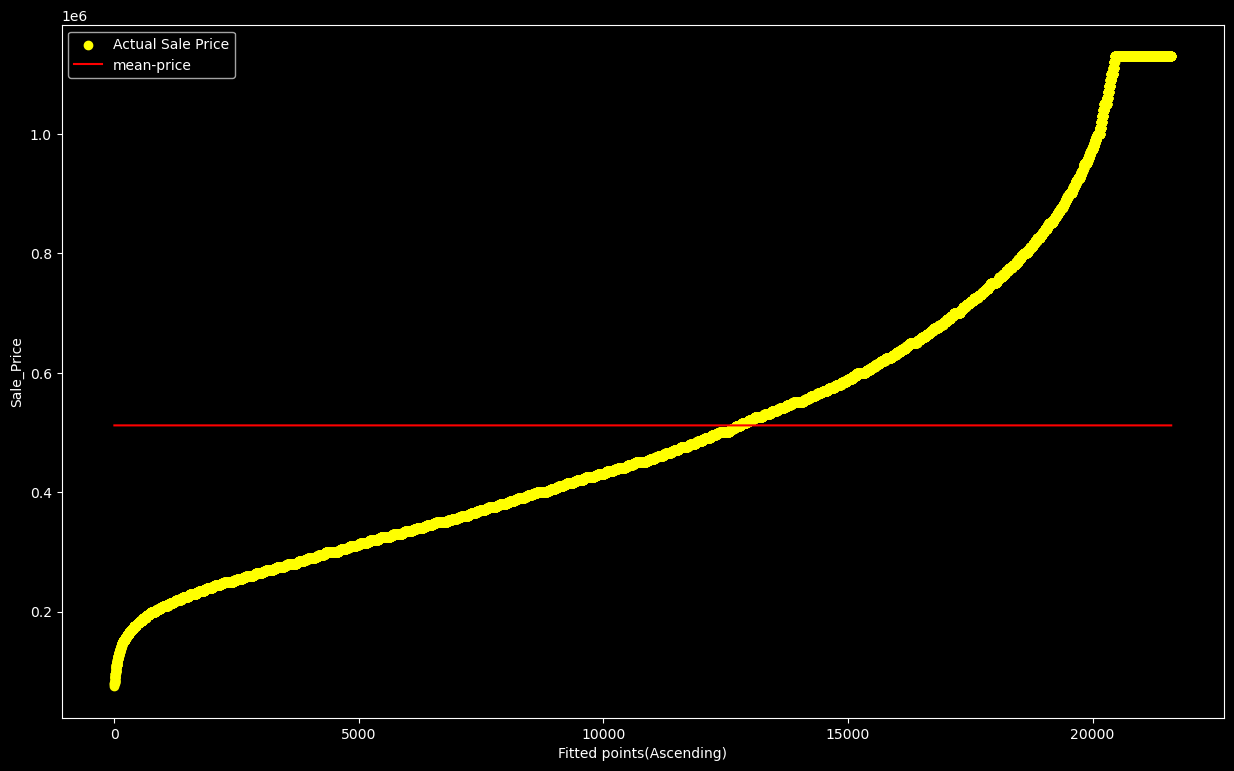

In [4]:
plt.figure(dpi=100,figsize=(15,9))
k=range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color='yellow',label='Actual Sale Price')
plt.plot(k,data['mean_sales'],color='red',label='mean-price')
plt.xlabel('Fitted points(Ascending)')
plt.ylabel('Sale_Price')
plt.legend()

# dpi=dots per inch
# here the mean sale pirce is not a very good predictor clearly 

In [5]:
data["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

# IMPROVED MEAN REGRESSION MODEL

In [6]:
grade_mean=data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grade_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [7]:
data['grade_mean']=0
for i in grade_mean.columns:
    data['grade_mean'][data['Overall Grade']==i] = grade_mean[i][0]
    
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [8]:
gradewise_list = []
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  gradewise_list.append(k)

In [9]:
classwise_list=[]
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  classwise_list.append(k)

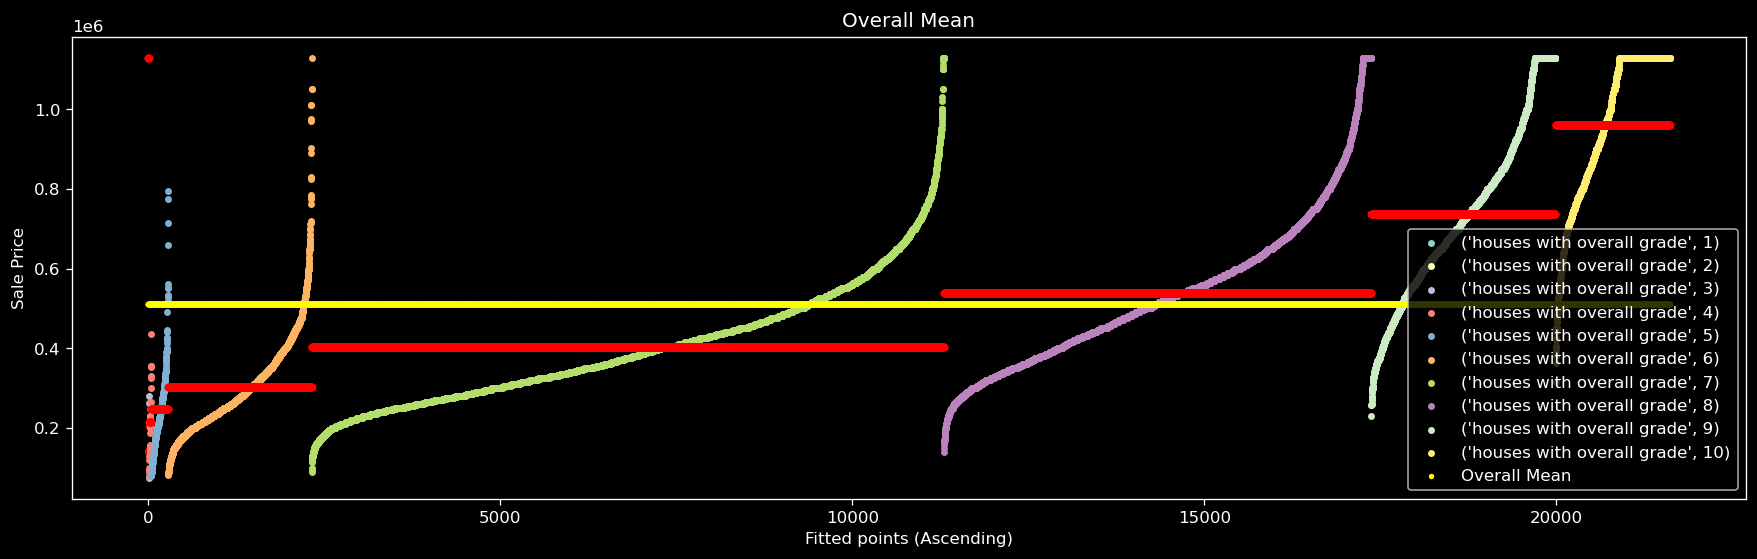

In [10]:
plt.figure( dpi = 120, figsize = (18,5) )              # Plotting "Sale_Price" gradewise 
z = 0                                                  # z variable is for x-axis
for i in range(1,11):
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]                        # defining x-axis using z
  plt.scatter(points                                   #x=axis
              , gradewise_list[i-1].sort_values()      #y-axis
              ,label = ('houses with overall grade', i), s = 10 )
  plt.scatter(points,[classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], s = 12, color = 'red')
  z = max(points) + 1
     
# Plotting Overall Mean
plt.scatter([q for q in range(0, z)],data['mean_sales'], color = 'yellow', label = 'Overall Mean',s = 5)
plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)                                      #location of the legend 

# RESIDUAL PLOT

In [11]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

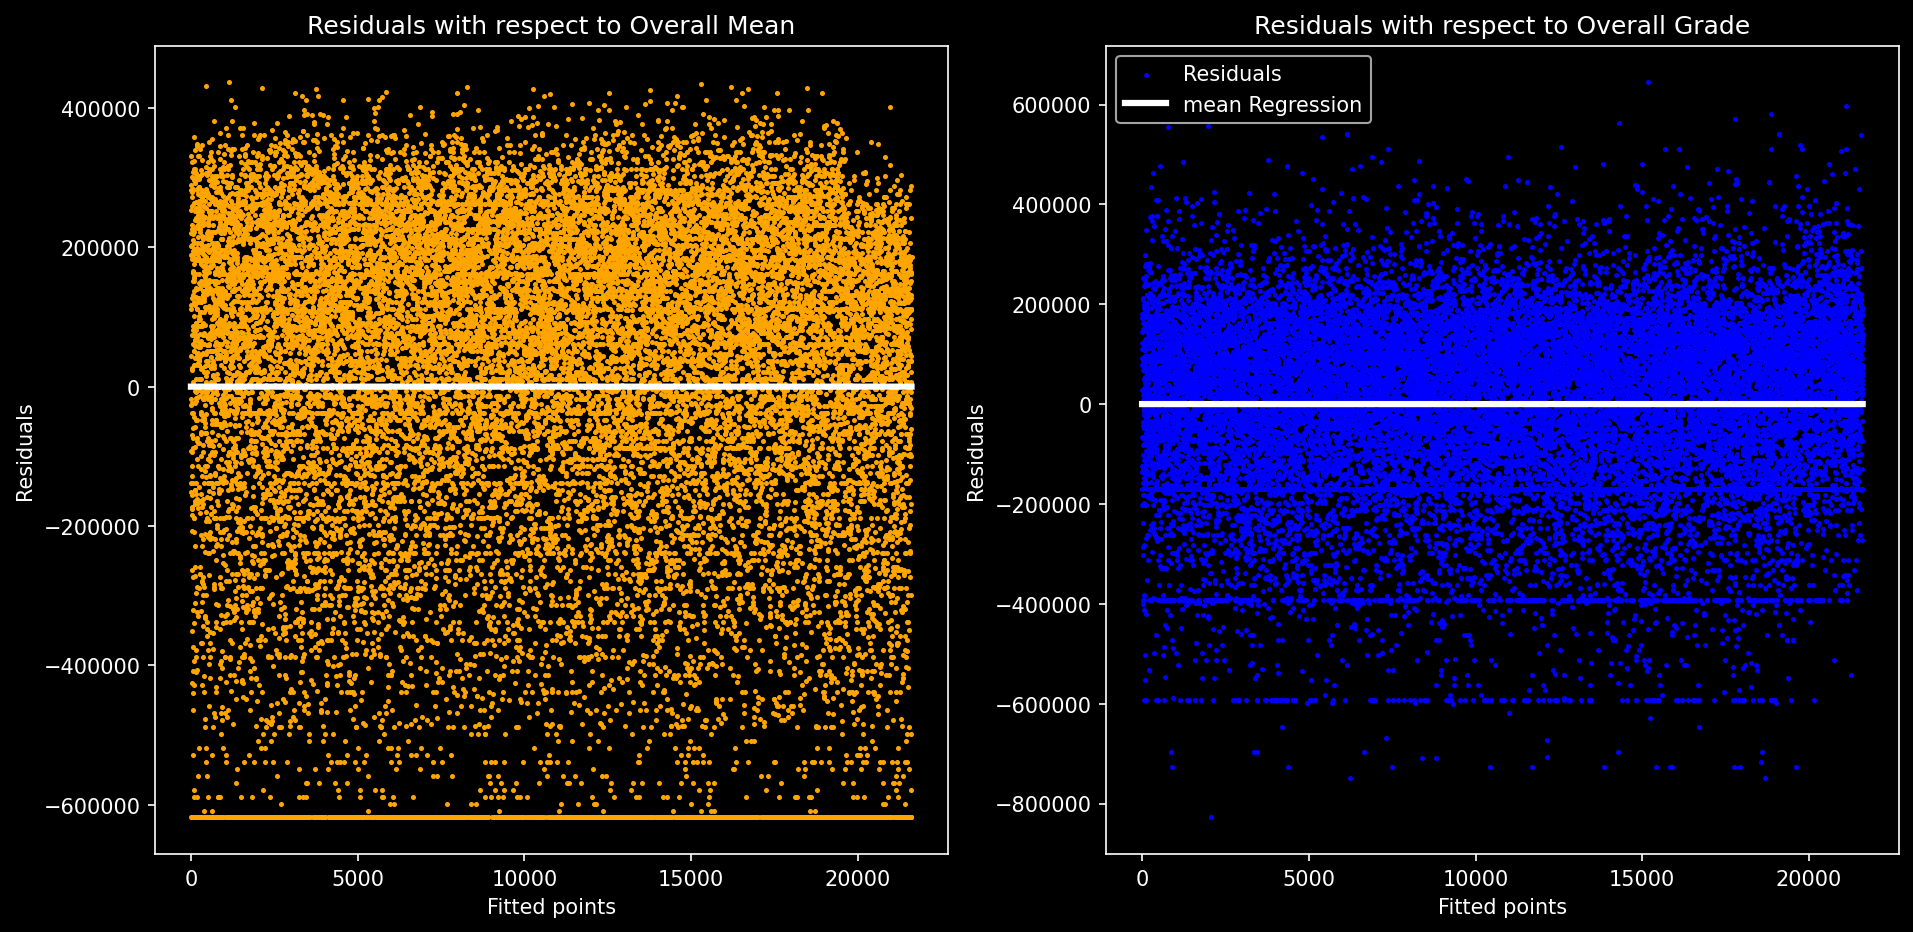

In [12]:
plt.figure(figsize = (15,7), dpi =150)
k = range(0, len(data))                 # to create a list of indices for the data points
l = [0 for i in range(len(data))]       # A list of zeros which will represent the residual of a perfect model where 
                                        # predictions are exactly the same as actuals and hence the residuals would be zero
plt.subplot(1,2,1)
plt.scatter( k, mean_difference, color = 'orange', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'white', label = 'mean Regression', linewidth = 3)
 # white line represents the zero line i.e. the residual is zero which means a perfect predictive model
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'blue', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'white', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title("Residuals with respect to Overall Grade")
plt.legend()
# The 'overall grade' based model is more near to zero line that is the perfect model that assures our assumption that
# The mean regression based on the categorical feature will give better results

# MODEL EVALUATION METRICS

In [13]:
mean_error = sum(mean_difference)/len(data)
print(round(mean_error, 7))

0.0


In [14]:
Y = data["Sale_Price"]
Y_hat1 = data["mean_sales"]
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [15]:
mean_absolute_error_sales = sum(abs(Y_hat1 - Y))/n
mean_absolute_error_sales

199168.78146839526

In [16]:
mean_absolute_error_grades = sum(abs(Y_hat2 - Y))/n
mean_absolute_error_grades                                 # less amount of error compared to model 1

137081.70298203363

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_grades = mean_absolute_error(Y_hat2, Y)
mean_absolute_error_grades

137081.7029820291

In [18]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error( Y_hat1, Y)
mse2 = mean_squared_error( Y_hat2, Y)
mse1, mse2

(62528116847.799576, 30804835720.342426)

In [19]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error( Y_hat1, Y)**0.5
rmse2 = mean_squared_error(Y_hat2, Y)**0.5
rmse1, rmse2

(250056.2273725643, 175513.06424406826)

# R²  or coefficient of determination

In [20]:
Y = data["Sale_Price"]
Y_bar = data["mean_sales"]
Y_hat = data['grade_mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [21]:
mse_mean = mean_squared_error( Y_bar, Y)
mse_mean                                         # MODEL 1

62528116847.799576

In [22]:
mse_model = mean_squared_error( Y_hat, Y)
mse_model                                        # MODEL 2

30804835720.342426

In [23]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

In [24]:
from sklearn.metrics import r2_score
score = r2_score(Y, Y_hat)
score

0.5073442592981836

# LINEAR REGRESSION

In [25]:
sale_price = data["Sale_Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({ 'sale_price': sale_price,'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


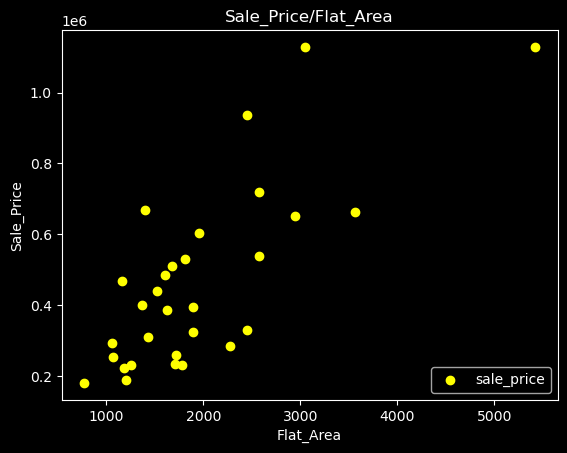

In [26]:
plt.figure( dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'yellow', label = 'sale_price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend(loc=4)
plt.show()

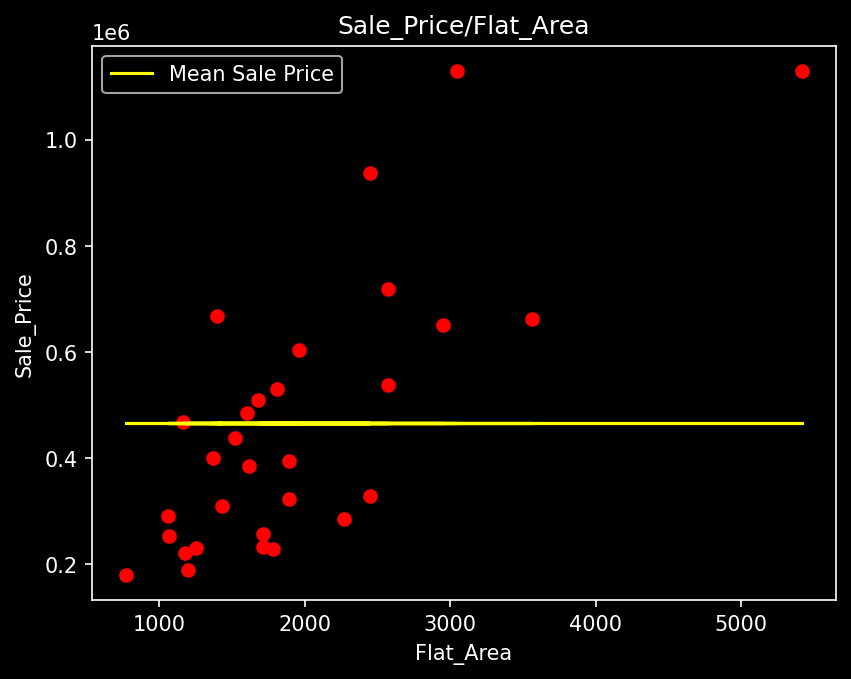

In [27]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()
#SIMPLE MEAN REGRESSION FOR SALE PRICE PREDICTION MODEL
plt.figure( dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = "yellow", label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

# Mathematics of linear regression

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

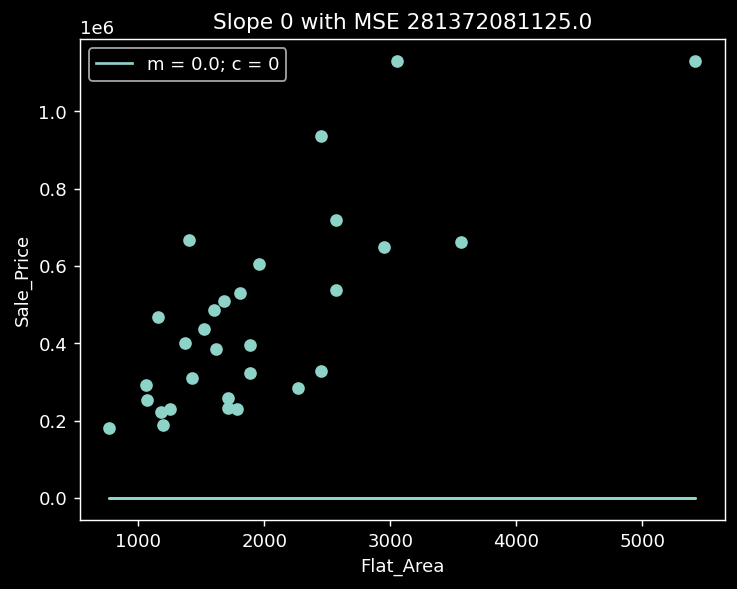

In [28]:
from sklearn.metrics import mean_squared_error as mse

c = 0
m = 0
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

Text(0.5, 1.0, 'Slope 130 with MSE 78118510041.66667')

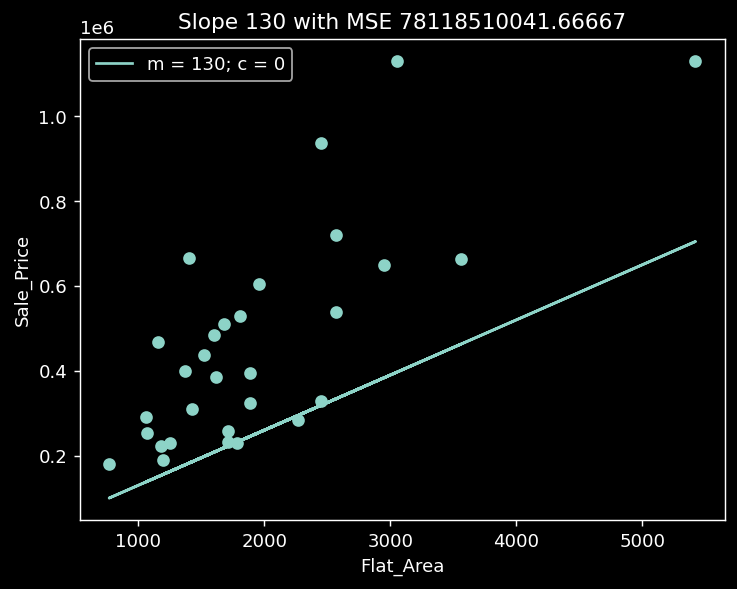

In [29]:
c = 0
m = 130
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 130; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [30]:
def slope_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept                 #y=mx+c
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [31]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 0, sample_data = sample_data)       #function-call
    Cost.append(cost)

In [32]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.head()

,slope,Cost
0,0.0,2.813721e+11
1,0.1,2.811558e+11
2,0.2,2.809395e+11
3,0.3,2.807234e+11
4,0.4,2.805073e+11


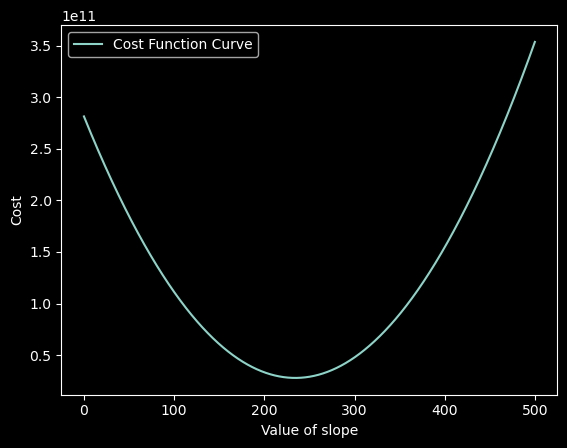

In [33]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [34]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]                                   #global minima

234.3

In [35]:
def intercept_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept               #y=mx+c
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [36]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 234, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [37]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


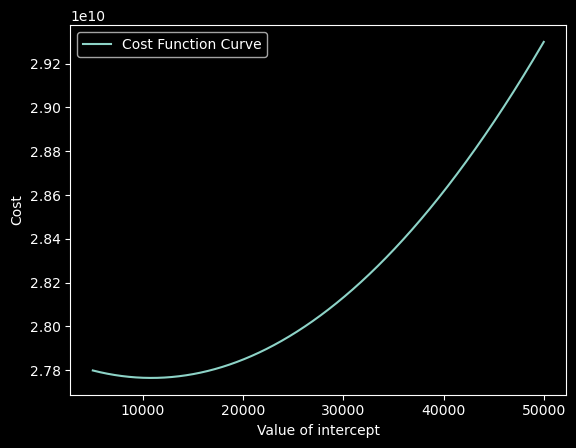

In [38]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [39]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]                     #global minima

10834

In [40]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)

In [41]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


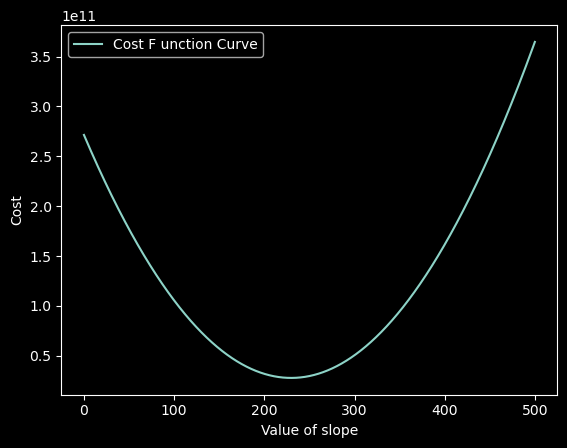

In [42]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost F unction Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [43]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]                        #new slope obtained by updating the value of intercept

229.7

In [44]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 229.7, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [45]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


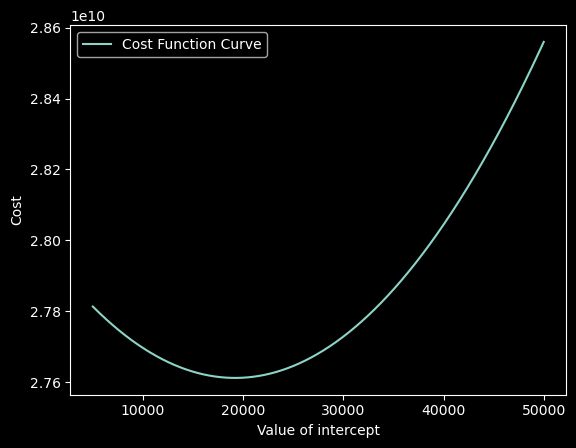

In [46]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [47]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

19199

# Gradient Descent Algorithm

In [48]:
sale_price = data["Sale_Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data.head()

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


In [49]:
# STEP 1: INITIALIZING THE PARAMETER

def param_init(Y):
  '''   Y = target variable
  returns initialized values of m and c
  '''
  m = 0.1
  c = Y.mean()
  return m, c

In [50]:
# STEP 2: GENERATING THE PREDICTIONS

def generate_predictions(m, c, X):
  '''
  X = independent variable
  returns prediction generated by line with parameters m, c
  '''
  prediction = []
  for x in X:
    pred = (m * x) + c  
    prediction.append(pred)
  return prediction

In [51]:
# STEP 3: CALCULATING THE COST

def compute_cost(prediction, Y):
  '''
  returns the mean_squared_error between prediction and Y
  '''
  cost = np.sum(((prediction - Y)**2)/len(Y))      # Y = m X + c
  return cost

In [52]:
# STEP 4(a): UPDATING THE PARAMETER - calculating the gradients

def gradients(prediction, Y, X):
  '''
  Returns Gradients corresponding to m and c
  '''
  n = len(Y)
  Gm = (2 * np.sum((prediction - Y) * X))/n        #(Y = m X + c)'s partial differntiation w.r.t 'm'
  Gc = (2 * np.sum((prediction - Y)))/n            #(Y = m X + c)'s partial differntiation w.r.t 'c'
  return Gm, Gc

In [53]:
# STEP 4(b): UPDATING THE PARAMETER - using the gradients to update the parameters m and c

def param_update(m_old , c_old , Gm_old, Gc_old, alpha):
  '''
  Update and return the new values of m and c
  '''
  m_new = m_old - alpha * Gm_old          #alpha is the constant i.e. the learning rate of the machine(here alpha = 0.01)
  c_new = c_old - alpha * Gc_old
  return m_new, c_new

In [54]:
def result(m, c, X, Y, cost, predictions, i):
  '''
  Print and plot the final result obtained from gradient descent
  '''
  ##If the Gradient Descent converged to the optimum value before max_iter
    
  if i < max_iter - 1 :
    print("** Gradient Descent has converged at iteration {} **".format(i))
  else:
    print("** Result after", max_iter,'iterations is: **')
  
  ## plotting the final result
     
  plt.figure(figsize = (14,7), dpi = 120)
  plt.scatter(X, Y, color = 'red', label = 'data points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color = 'green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 5 : m = -2.34973542961208e+31 ; c = -9.898901495920051e+27 ; Cost = 2.9894999241996498e+59
After Iteration 10 : m = 1.5779375314398147e+56 ; c = 6.647492306406882e+52 ; Cost = 1.3481562464026376e+109
After Iteration 15 : m = -1.0596456187143728e+81 ; c = -4.4640462360345516e+77 ; Cost = 6.07969664090571e+158
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 25 : m = -4.778618150409968e+130 ; c = -2.0131232547033295e+127 ; Cost = 1.2364178686285044e+258
After Iteration 30 : m = 3.2090255068402474e+155 ; c = 1.3518895357232105e+152 ; Cost = inf
After Iteration 35 : m = -2.1549838006344655e+180 ; c = -9.078457131365513e+176 ; Cost = inf
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 45 : m = -9.718196840227874e+229 ; c = -4.0940555275731134e+226 ;

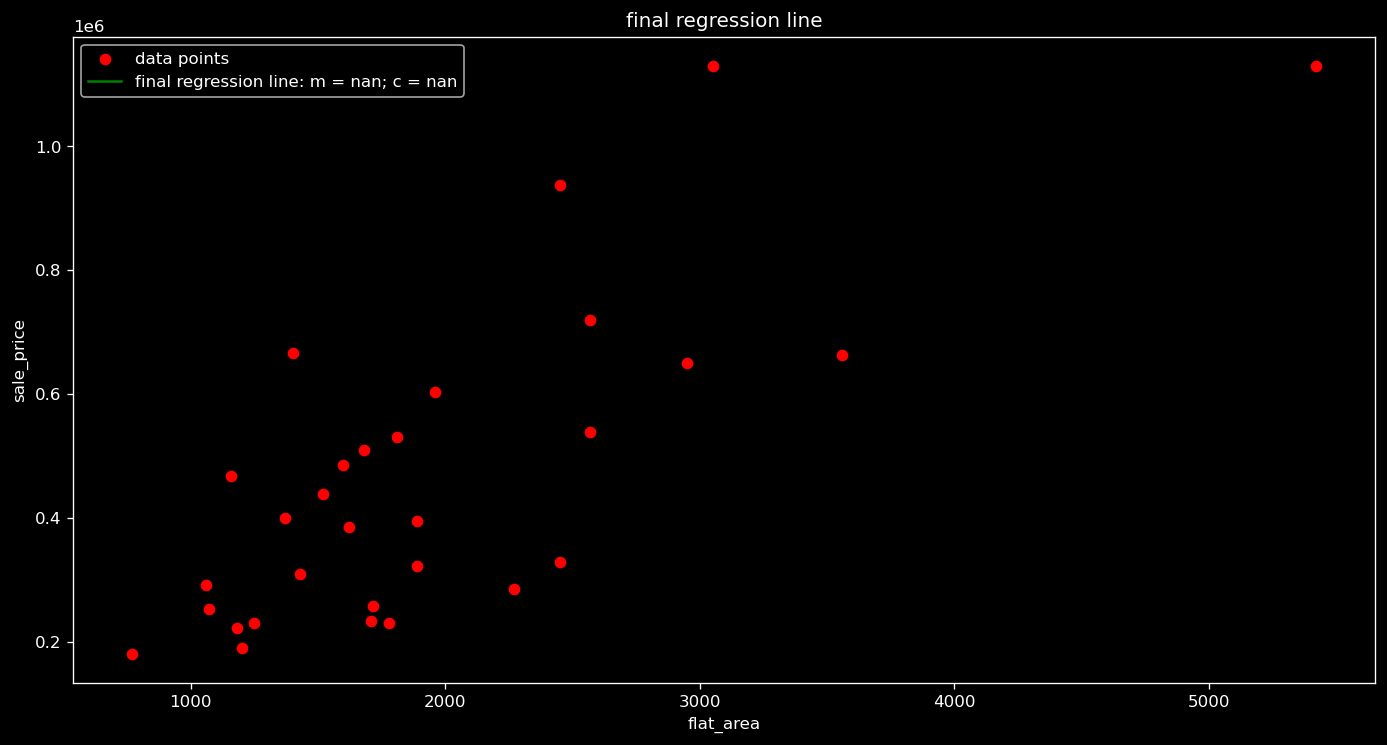

In [55]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 100
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%5 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
** Result after 100 iterations is: **


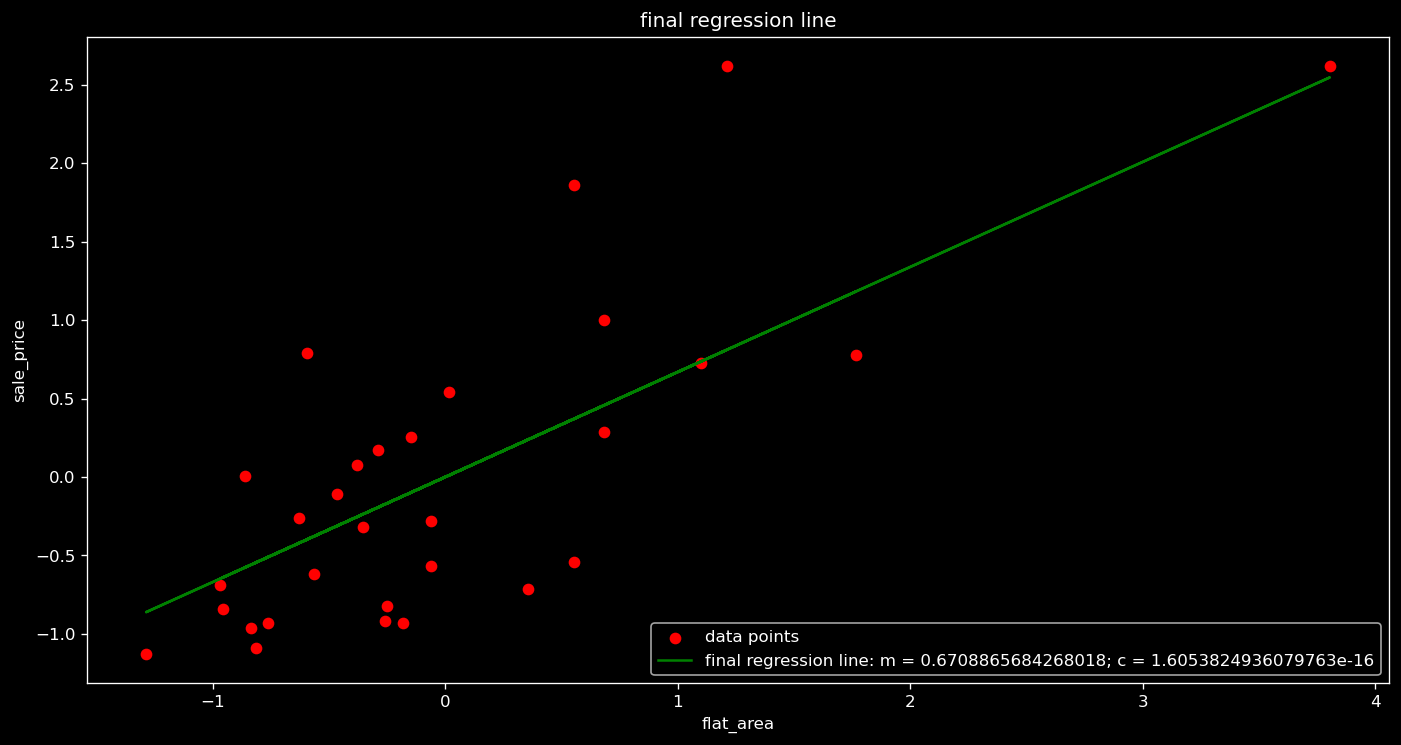

In [56]:
## scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 100
cost_old = 0
alpha = 0.01
## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)
## Gradient Descent in action
for i in range(0 , max_iter):
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)
  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)
  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)
  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)
  ##updating cost_old
  cost_old = cost_new
## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

# Assumptions in Linear Regression

# Steps in implementing Linear Regression model 

Checking the assumptions of Linear Regression :-

   Before implementing the model:
      Multicollinearity, as there should be no correlation between the independent variables

   After implementing the model:
      Homoscedasticity and Normal distribution of error terms, as it requires residuals (obtained after the model has been built)

## (1) Importing libraries and the dataset

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [58]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


##  (2) Scaling the dataset 

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Y = data['Sale_Price']                    # Target Variable
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))         #Independent Variable
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
Y = pd.DataFrame(data = Y, columns = ['Sale_Price'])
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [60]:
Y.head()

,Sale_Price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


## (3) Checking and Removing Multicollinearity

In [61]:
X.corr()
'''It gives us the correlation between every possible pair of variables in our dataset.'''

'It gives us the correlation between every possible pair of variables in our dataset.'

pair of independent variables with correlation greater than 0.5 as The highly correlated variables will result in a model 
with poor interpretation. 
i.e Correlation > 0.5, then one of the two independent variables is eliminated


In [62]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

32 is the length of highly correlated data out of which each pair repeats itself therefore 16 multicollinear variables

List comprehension allows us to write simple loops and simple nested loops to form a list in a single line.
Syntax of List Comprehension:
Result = [(element of final list) x (how to take different values) x (condition to store the final element)]

CALCULATING VIF

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                                  1.639470
 No of Bathrooms                                 3.374992
 Flat Area (in Sqft)                          1481.681648
 Lot Area (in Sqft)                              2.108079
 No of Floors                                    2.127787
 No of Times Visited                             1.432385
 Overall Grade                                   2.967448
 Area of the House from Basement (in Sqft)    1205.549115
 Basement Area (in Sqft)                       345.465009
 Age of House (in Years)                         2.629539
 Latitude                                        2.471442
 Longitude                                       1.672691
 Living Area after Renovation (in Sqft)          3.068139
 Lot Area after Renovation (in Sqft)             2.144347
 Years Since Renovation                          2.788098
 Condition_of_the_House_Excellent               53.578111
 Condition_of_the_House_Fair                   166.129930
 Condition_of_

VIF value exceeding the threshold value of 5 need to be replaced i.e. 7 such variables (earlier it was 16)

Removing only one variable from pair of correlated independent variables is enough.
If one variable is removed, there is a good chance that the VIF of other variables will go down.

In [64]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [65]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

# USING THE FUNCTION:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [66]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

## (4) Creating test and train partitions

In [67]:
X = vif_data
Y = data['Sale_Price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

## (5) Implementing Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train) 

LinearRegression()

In [69]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

## (6) Generating predictions over the test set

In [70]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.8461987715586199

## (8) Preparing the Residual plot

In [71]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals':residuals, 'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [72]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

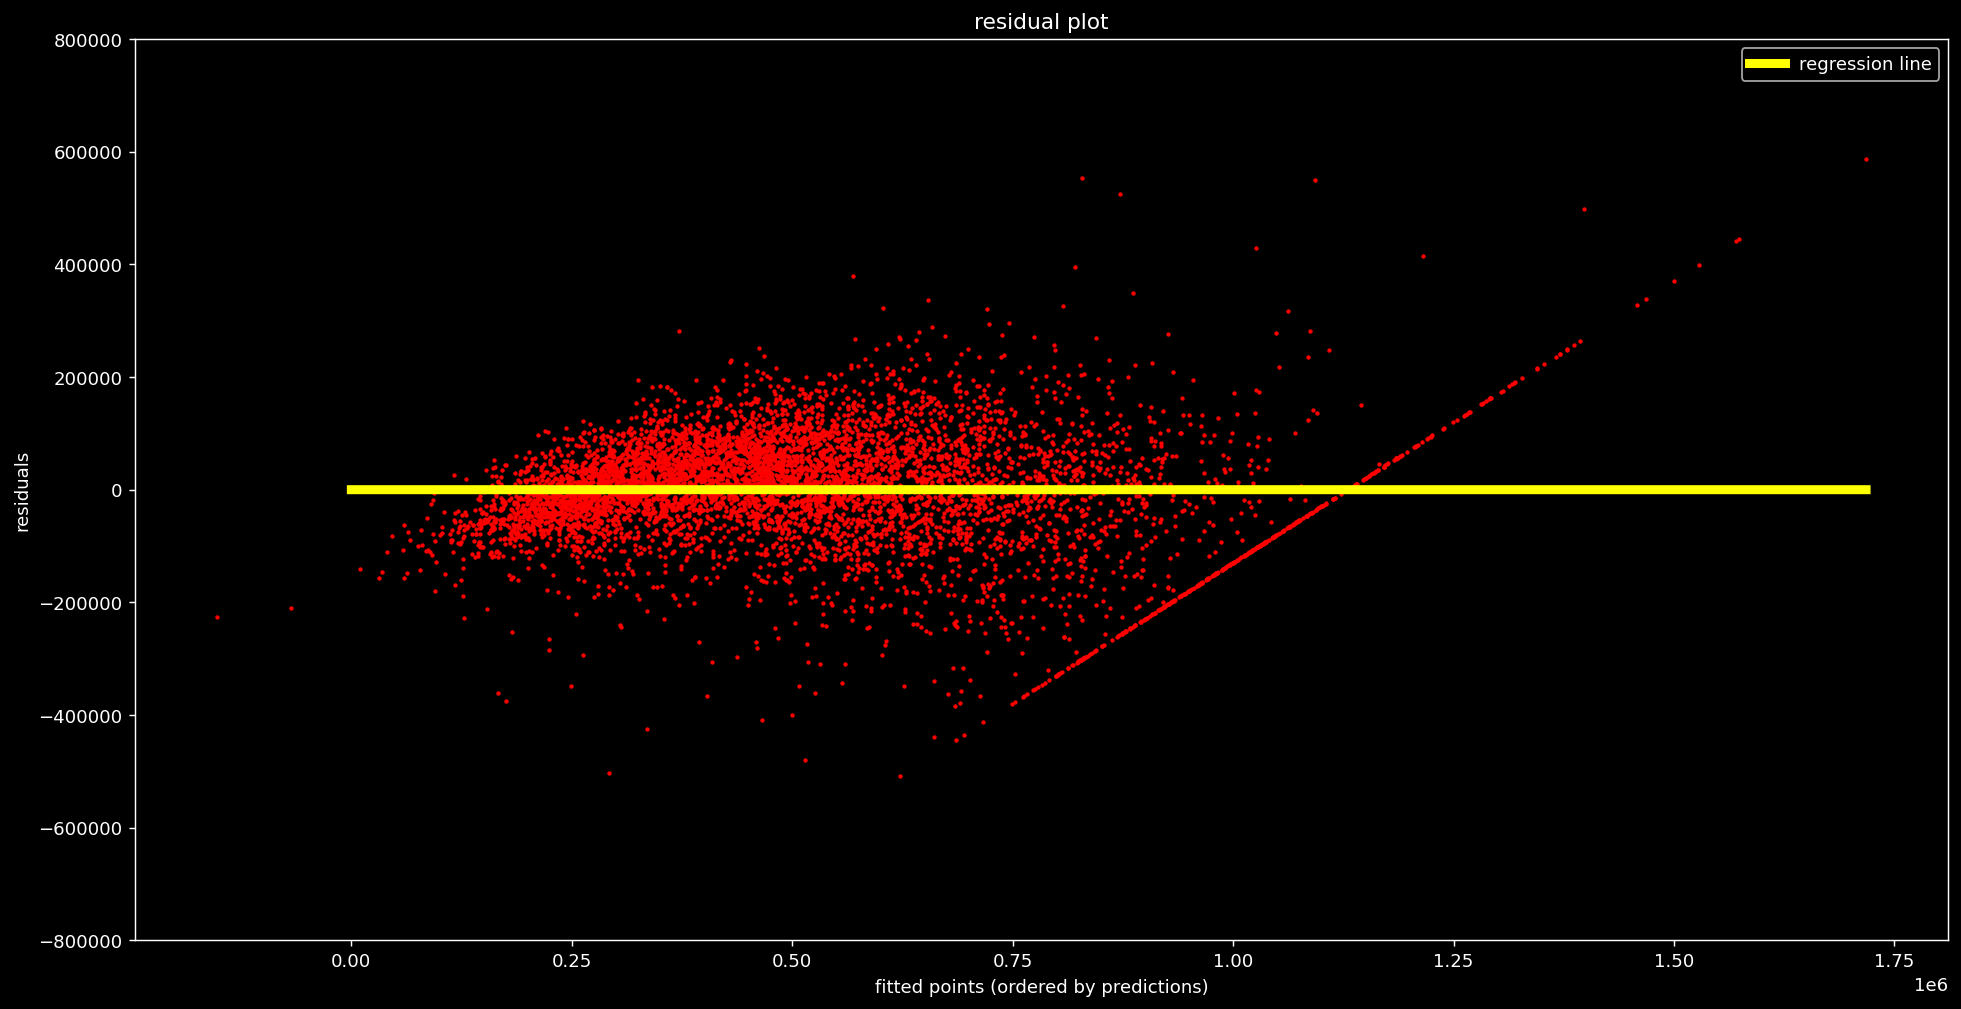

In [73]:
plt.figure(dpi = 130, figsize = (18,9))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'yellow', linewidth = 5,label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()  

## (9) Distribution of Errors

USE OF HISTOGRAM FOR CHECKING THE DISTRIBUTION

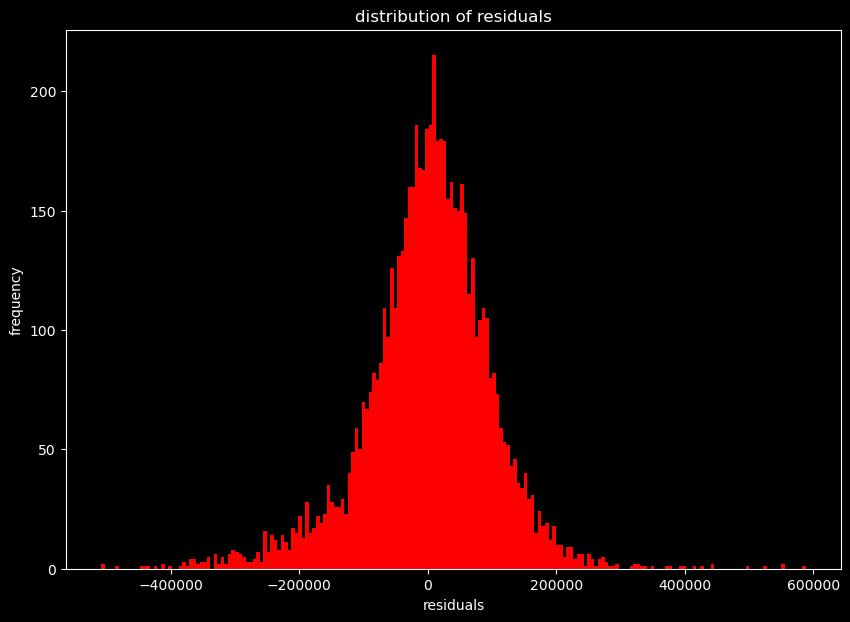

In [74]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# The residuals follow a normal distribution

## (10) Visualising the Coefficient plot

In [75]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


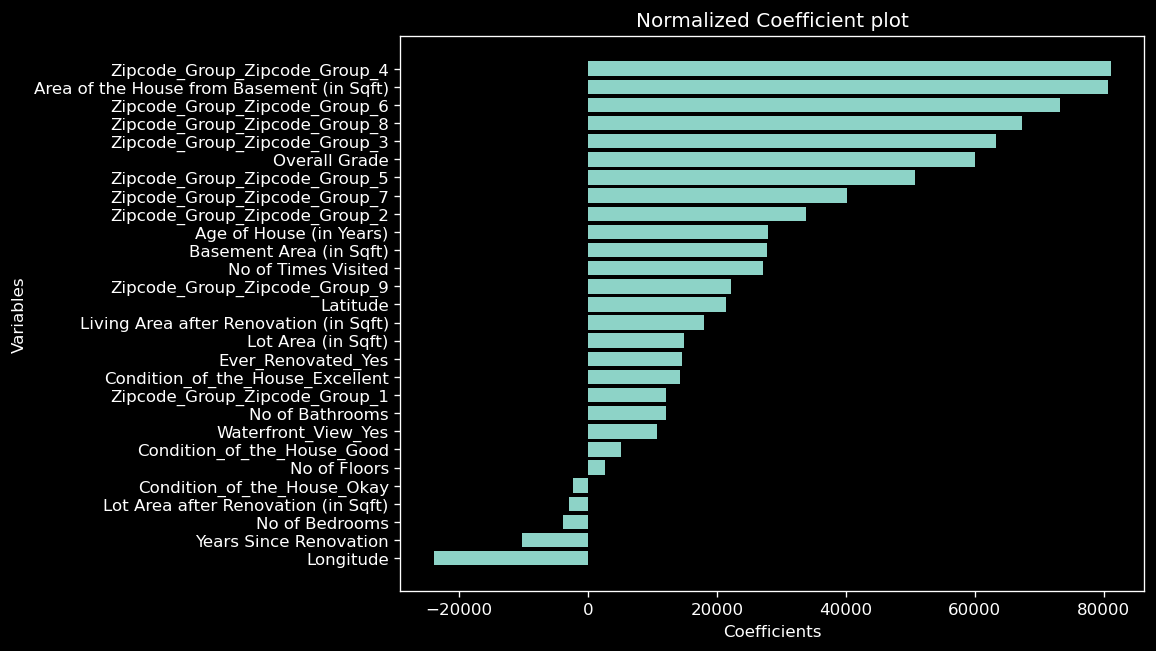

In [76]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

# FEATURE ENGINEERING

In [77]:
data = pd.read_csv('Raw_Housing_Prices3.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


## Feature Transformation

In [78]:
sum(data.isnull().sum())

0

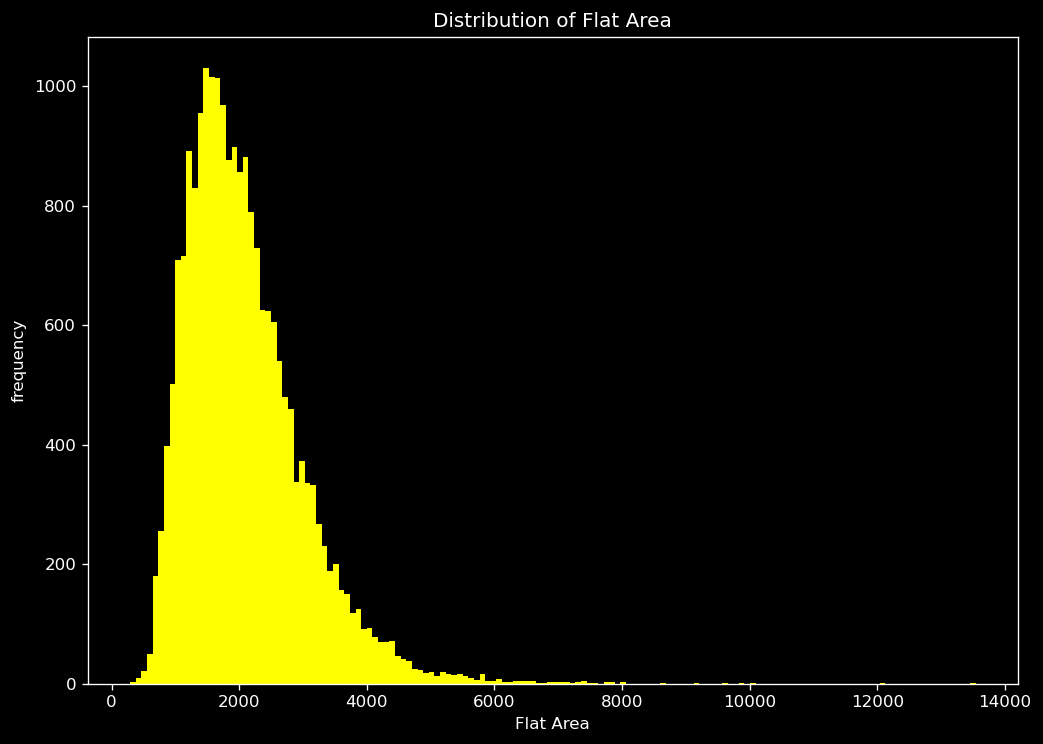

In [79]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Flat Area (in Sqft)'], bins = 150, color = 'yellow')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()                                       #right skewed

In [80]:
def log_transform(sample_data):
  return np.log(sample_data)

data['Transformed Flat Area'] = data['Flat Area (in Sqft)'].map(log_transform)

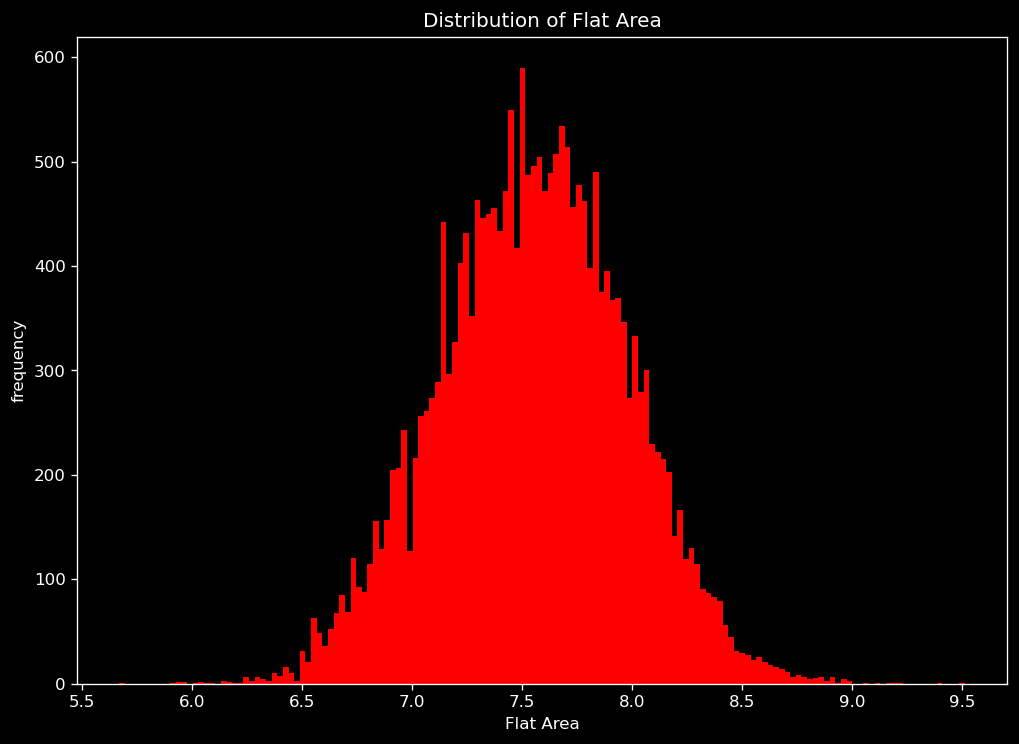

In [81]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Transformed Flat Area'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

## Dummy/One Hot Encoding

In [82]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [83]:
dummy_var1 = pd.get_dummies( data['Condition of the House'], drop_first = True, prefix = 'Condition')
dummy_var1.head()

,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Okay
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [84]:
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [85]:
label_encoded = label_encoded.map({ 'Bad':1,'Okay':2,'Fair':3,'Good':4,'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

In [86]:
len(data['Age of House (in Years)'].unique())

116

In [87]:
data['Age of House (in Years)'].max()

118

In [88]:
data['Age of House (in Years)'].min()

3

In [89]:
def age_of_house(x):
  if x < 10:
    x = 'new'
  elif x < 50:
    x = 'old'
  else:
    x = 'very old'
  return x

cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

In [90]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [91]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [92]:
mean = []

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

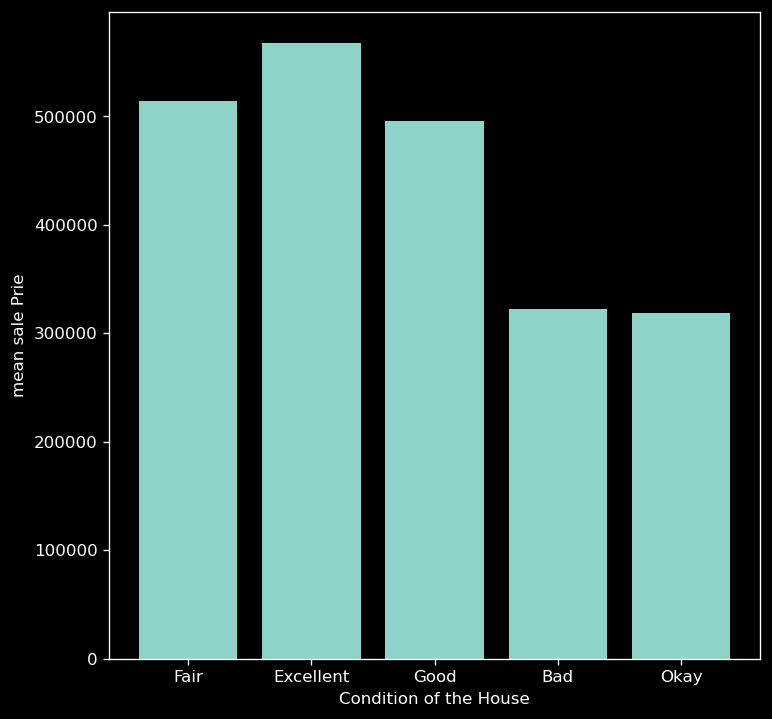

In [93]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

In [94]:
mapping = {'Excellent':'Excellent',
           'Fair':'Good',
           'Good':'Good',
           'Okay':'Okay',
           'Bad':'Okay'}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

In [95]:
mean = []

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

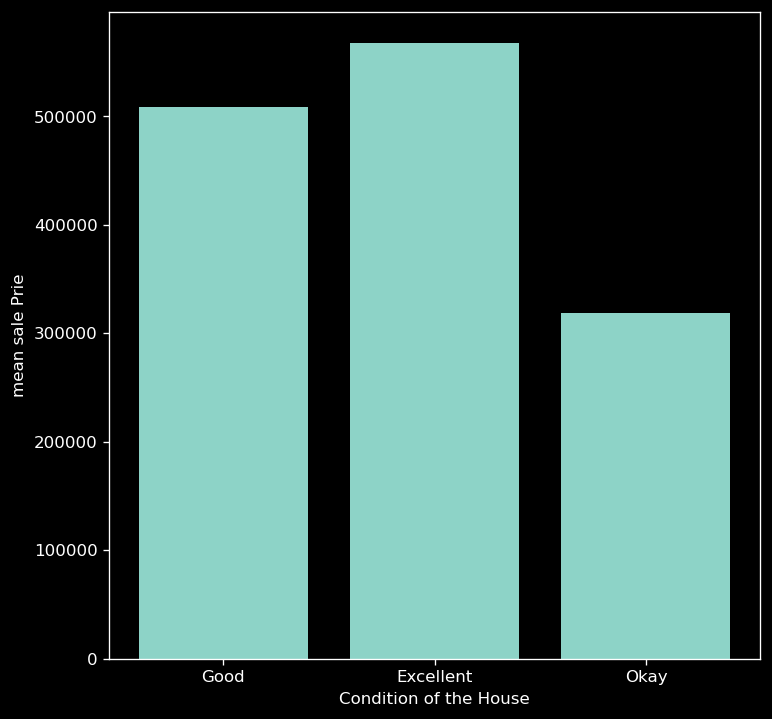

In [96]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

In [97]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [98]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year
data['month_sold'] = time.month
data['weekday_sold'] = time.day_name()  # Corrected line
data['date_sold'] = time.days_in_month  # Corrected line

data[['year_sold','month_sold','weekday_sold','date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29


In [99]:
month_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'month_sold',
                aggfunc = 'mean')

month_sale

month_sold,1,2,3,4,5,6,7,8,9,10,11,12
Sale Price,494549.626789,485457.269015,515501.697439,533078.767817,518714.583092,527367.035337,519160.693351,507810.789691,502577.903044,508442.986155,495134.871722,497170.721278


Text(0, 0.5, 'mean_sale')

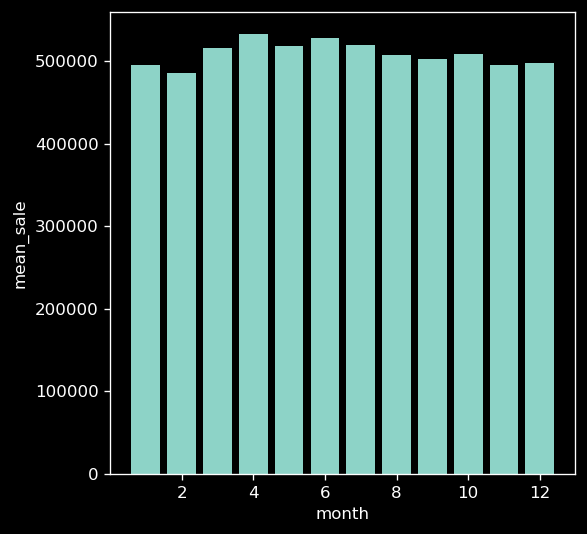

In [100]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(month_sale.columns, month_sale.iloc[0])
plt.xlabel("month")
plt.ylabel('mean_sale')

In [101]:
weekday_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'weekday_sold',
                aggfunc = 'mean')

weekday_sale

weekday_sold,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sale Price,520448.811624,499055.835999,508442.986155,518714.583092,500126.758398,506753.572298,527367.035337


Text(0, 0.5, 'mean_sale')

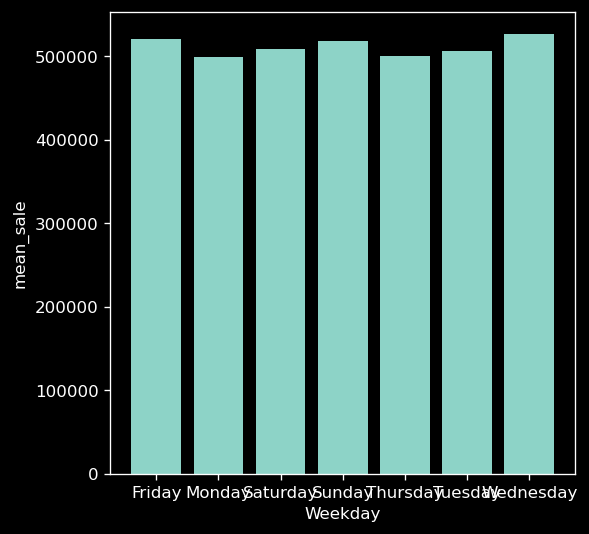

In [102]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Weekday")
plt.ylabel('mean_sale')

In [103]:
date_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'date_sold',
                aggfunc = 'mean')

date_sale

date_sold,29,30,31
Sale Price,485457.269015,517266.623436,510817.80564


Text(0, 0.5, 'mean_sale')

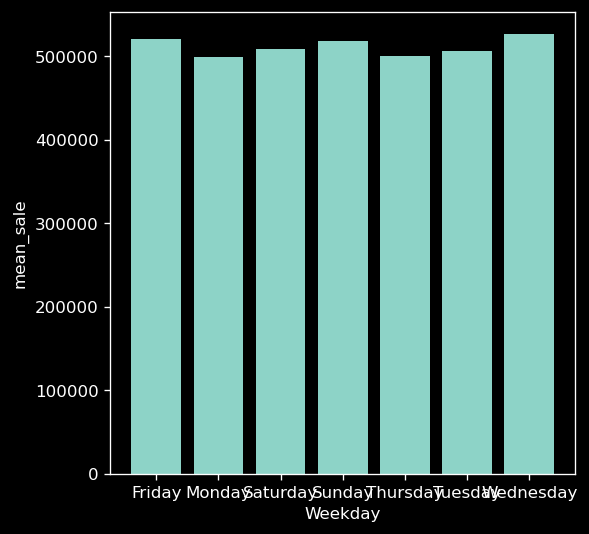

In [104]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Weekday")
plt.ylabel('mean_sale')

In [105]:
date_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'date_sold', aggfunc = 'mean')
date_sale

date_sold,29,30,31
Sale Price,485457.269015,517266.623436,510817.80564


Text(0, 0.5, 'mean_sale')

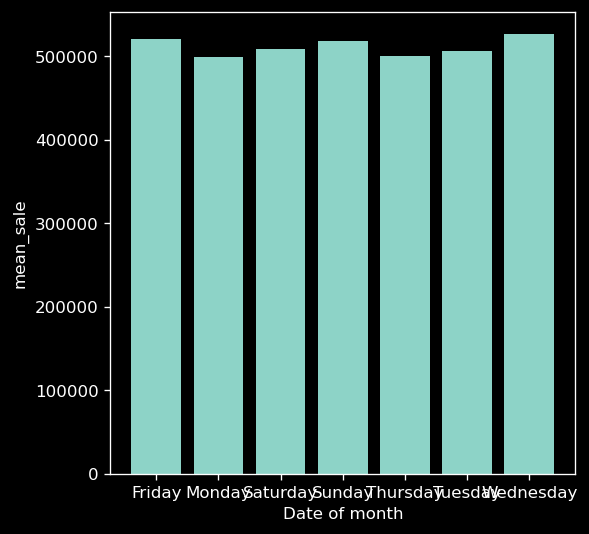

In [106]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Date of month")
plt.ylabel('mean_sale')

Text(0, 0.5, 'frequency ratio')

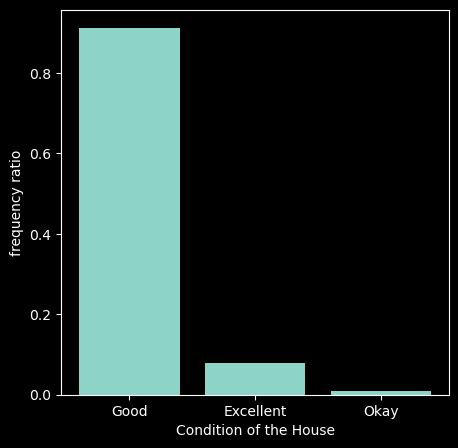

In [107]:
freq_condition = data['Condition of the House'].value_counts()
freq_condition = freq_condition/freq_condition.sum()

plt.figure( figsize = (5,5), dpi = 100)
plt.bar(freq_condition.index, freq_condition)
plt.xlabel('Condition of the House')
plt.ylabel('frequency ratio')

In [108]:
data['freq_cond'] = 0

for i in data['Condition of the House'].unique():
  data['freq_cond'][data['Condition of the House']==i] = freq_condition.loc[i]

data['freq_cond'].head()

0    0.911935
1    0.911935
2    0.911935
3    0.078717
4    0.911935
Name: freq_cond, dtype: float64

In [109]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Transformed Flat Area',
       'year_sold', 'month_sold', 'weekday_sold', 'date_sold', 'freq_cond'],
      dtype='object')

In [110]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Excellent','Good']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2 :
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [111]:
data['luxury_home'].value_counts()

No     11285
Yes    10324
Name: luxury_home, dtype: int64

In [112]:
luxury = data.pivot_table(values = "Sale Price", columns = 'luxury_home', aggfunc = 'mean' )
luxury

luxury_home,No,Yes
Sale Price,380385.64475,655067.166021


Text(0, 0.5, ' Mean Sale Price')

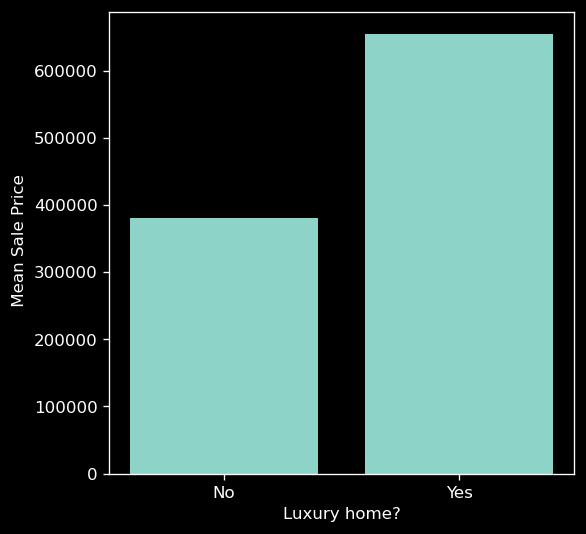

In [113]:
plt.figure(figsize = (5,5), dpi = 120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury home?')
plt.ylabel(" Mean Sale Price")

In [115]:
import os
import psutil
import multiprocessing

# Get memory information
mem = psutil.virtual_memory()
mem_gib = mem.available / (1024**3)

# Get CPU count
num_cores = multiprocessing.cpu_count()

print("RAM: {:.2f} GB".format(mem_gib))
print("CORES: {}".format(num_cores))

RAM: 1.74 GB
CORES: 8
